**Notebook Contents**

Simple EDA

One-hot Encoding variables

Log transformation for skewed variables

Pair plot for features

Basic feature engineering: adding polynomial and interaction terms

Feature engineering: categories and features derived from category aggregates

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
## Load in the Ames Housing Data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv'

df= pd.read_csv(url, sep= '\t')
data= df.copy()
df[:5]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
# This is recommended by the data set author to remove a few outliers

df= df.loc[df['Gr Liv Area'] <= 4000]
print(f"Number of rows: ", df.shape[0])
print(f"Number of columns: ", df.shape[1])

Number of rows:  2925
Number of columns:  82


## **Selecting / Filtering data based on dtypes**

In [ ]:
numeric= df.select_dtypes(include=['float64', 'int64'])
numeric[:2]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000


In [ ]:
objects= df.select_dtypes('object')
objects[:2]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols= df.dtypes[df.dtypes == object]
one_hot_encode_cols= one_hot_encode_cols.index.tolist()
df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


## **One hot encoding (dummy variables)**

In [ ]:
one_hot_encode_cols

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [ ]:
df= pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True, dtype=int)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,732.0,1463.0,2199.0,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,528477030.0,535453210.0,907180130.0,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,58.0,68.0,80.0,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7438.0,9428.0,11515.0,2.152450e+05
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,4.102564e-03,6.393067e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Alloca,2925.0,8.205128e-03,9.022520e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Family,2925.0,1.572650e-02,1.244366e-01,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Normal,2925.0,8.246154e-01,3.803608e-01,0.0,1.0,1.0,1.0,1.000000e+00


In [ ]:
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
cols_to_encode= data.dtypes[data.dtypes== object]
cols_to_encode

MS Zoning         object
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object


## **Log transforming skewed variables**

In [ ]:
# Create a list of float columns to check for skewing

mask= data.dtypes == float
float_cols= data.columns[mask]

skew_limit= 0.75
skew_values = data[float_cols].skew()
skew_values

Lot Frontage      1.499067
Mas Vnr Area      2.606985
BsmtFin SF 1      1.416182
BsmtFin SF 2      4.139978
Bsmt Unf SF       0.923053
Total Bsmt SF     1.156204
Bsmt Full Bath    0.616639
Bsmt Half Bath    3.940795
Garage Yr Blt    -0.384672
Garage Cars      -0.219836
Garage Area       0.241994
dtype: float64

In [ ]:
skew_values.sort_values(ascending=False).to_frame().rename(columns={0: 'Skew'}).query('abs(Skew) > {}'.format(skew_limit))

,Skew
BsmtFin SF 2,4.139978
Bsmt Half Bath,3.940795
Mas Vnr Area,2.606985
Lot Frontage,1.499067
BsmtFin SF 1,1.416182
Total Bsmt SF,1.156204
Bsmt Unf SF,0.923053


In [ ]:
# Showing the skewed columns
skewed_cols= (skew_values
              .sort_values(ascending=False)
              .to_frame()
              .rename(columns={0: 'Skew'})
              .query('abs(Skew) > {}'.format(skew_limit)))
skewed_cols

,Skew
BsmtFin SF 2,4.139978
Bsmt Half Bath,3.940795
Mas Vnr Area,2.606985
Lot Frontage,1.499067
BsmtFin SF 1,1.416182
Total Bsmt SF,1.156204
Bsmt Unf SF,0.923053


Text(0.5, 0.98, 'Field "BsmtFin SF 1"')

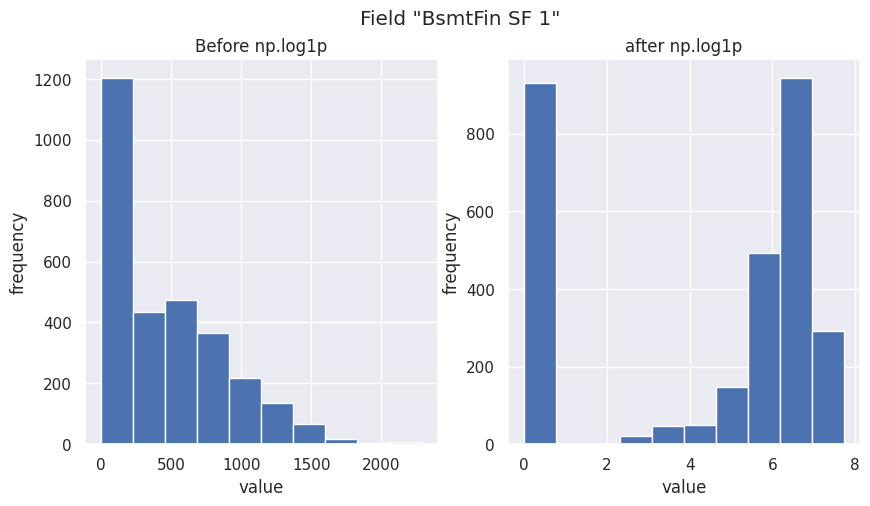

In [ ]:
field= "BsmtFin SF 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after)= plt.subplots(1,2, figsize=(10, 5))

# Create a histogram on the column before transformation(ax_before)
df[field].hist(ax= ax_before)

# Create a histogram on the column after transformation(x_after)
df[field].apply(np.log1p).hist(ax= ax_after)

# Formatting of titles for each subplot
ax_before.set(title= 'Before np.log1p', ylabel= 'frequency', xlabel='value')
ax_after.set(title= 'after np.log1p', ylabel= 'frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))

In [ ]:
skewed_cols.index.values

array(['BsmtFin SF 2', 'Bsmt Half Bath', 'Mas Vnr Area', 'Lot Frontage',
       'BsmtFin SF 1', 'Total Bsmt SF', 'Bsmt Unf SF'], dtype=object)

In [ ]:
# perform skew transformation
for col in skewed_cols.index.values:
  if col== 'SalePrice':
    continue
  df[col]= df[col].apply(np.log1p)

In [ ]:
df.shape

(2925, 261)

In [ ]:
df= data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Mas Vnr Type      1775
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
Length: 82, dtype: int64

In [ ]:
# Pick out just a few numeric columns
small_df= data.loc[:, ['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars','SalePrice']]
# Summary statistics of the subset data
small_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Overall Qual,2930.0,6.094881,1.411026,1.0,5.00,6.0,7.00,10.0
Overall Cond,2930.0,5.563140,1.111537,1.0,5.00,5.0,6.00,9.0
Year Built,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
Year Remod/Add,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
Gr Liv Area,2930.0,1499.690444,505.508887,334.0,1126.00,1442.0,1742.75,5642.0
Full Bath,2930.0,1.566553,0.552941,0.0,1.00,2.0,2.00,4.0
Bedroom AbvGr,2930.0,2.854266,0.827731,0.0,2.00,3.0,3.00,8.0
Fireplaces,2930.0,0.599317,0.647921,0.0,0.00,1.0,1.00,4.0
Garage Cars,2929.0,1.766815,0.760566,0.0,1.00,2.0,2.00,5.0


In [ ]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2929 non-null   float64
 10  SalePrice       2930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 251.9 KB


In [ ]:
# Replace NA with zero
small_df= small_df.fillna(0)
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
 10  SalePrice       2930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 251.9 KB


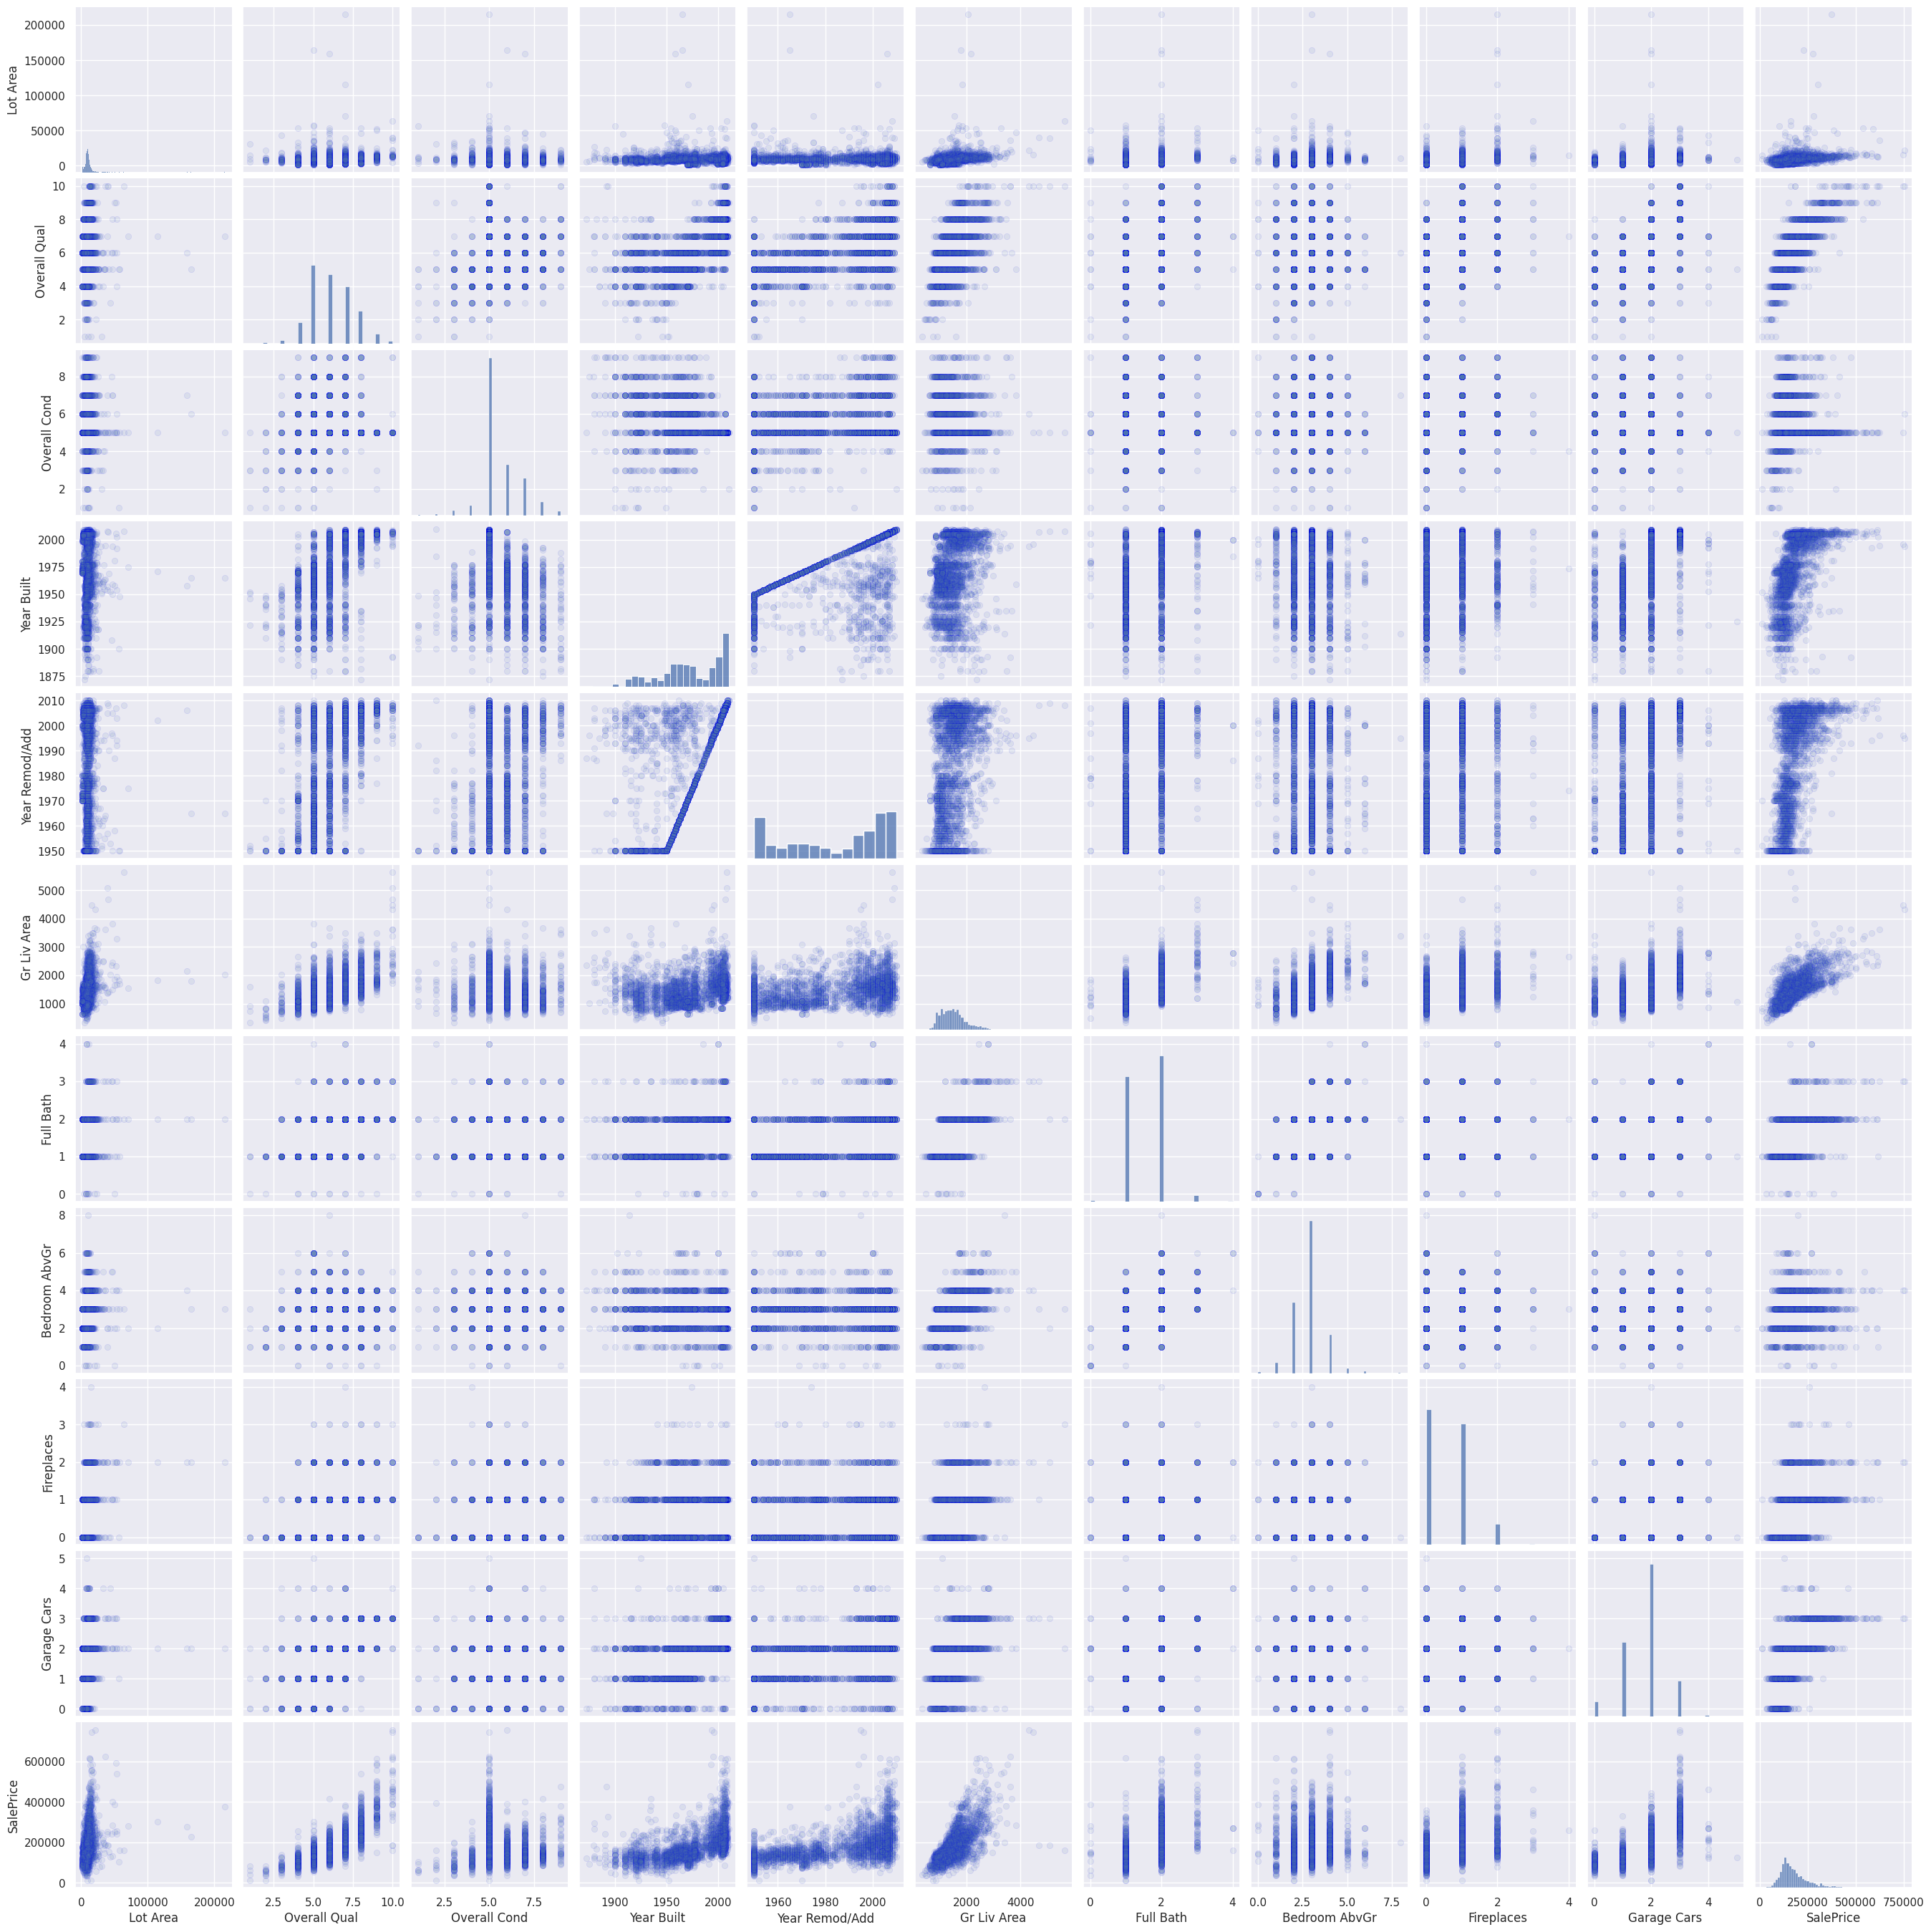

In [ ]:
sns.pairplot(small_df, plot_kws= dict(alpha=.1, edgecolor= 'blue'))

**Data Exploration Discussion**:

1) What do these plots tell us about the distribution of the target?

2) What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3) What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here?

In [ ]:
X= small_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars']]
y= small_df['SalePrice']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 229.0 KB


## **Basic feature engineering: adding polynomial and interaction terms**
One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like 'Overall Qual' and 'Gr Liv Qual', we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets.

## **Polynomial Features**

In [ ]:
X2= X.copy()

X2['QQ2']= X2['Overall Qual'] ** 2
X2['GLA2']= X2['Gr Liv Area'] ** 2

As is, each feature is treated as an independent quantity. However, there may be interaction effects, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing 'Overall Qual' for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies 'Overall Qual' by 'Year Built' can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide 'Overall Qual' by 'Lot Area'.

Let's try adding both of these interaction terms and see how they impact the model results.

## **Feature interactions**

In [ ]:
X3= X2.copy()

# multiplicative interaction
X3['QQ_X_YB']= X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA']= X3['Overall Qual'] / X3['Lot Area']

**Interaction Feature Exercise:** What other interactions do you think might be helpful? Why?

**Categories and features derived from category aggregates**
Incorporating categorical features into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called dummy variables or one-hot-encoding.

We'll first explore this using the 'House Style' feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

In [ ]:
data['House Style'].value_counts()

House Style
1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [ ]:
pd.get_dummies(data['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False


In [ ]:
nhood_counts= data.Neighborhood.value_counts()
nhood_counts

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.

In [ ]:
other_nhoods= list(nhood_counts[nhood_counts <= 8])
other_nhoods

[8, 2, 1]

In [ ]:
other_nhoods= list(nhood_counts[nhood_counts <= 8].index)
other_nhoods

['Greens', 'GrnHill', 'Landmrk']

In [ ]:
X4= X3.copy()

X4['Neighborhood']= df['Neighborhood'].replace(other_nhoods, 'Other')

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,QQ2,GLA2,QQ_X_YB,OQ_/_LA,Neighborhood
0,31770,6,5,1960,1960,1656,1,3,2,2.0,36,2742336,11760,0.000189,NAmes
1,11622,5,6,1961,1961,896,1,2,0,1.0,25,802816,9805,0.000430,NAmes
2,14267,6,6,1958,1958,1329,1,3,0,1.0,36,1766241,11748,0.000421,NAmes
3,11160,7,5,1968,1968,2110,2,3,2,2.0,49,4452100,13776,0.000627,NAmes
4,13830,5,5,1997,1998,1629,2,3,1,2.0,25,2653641,9985,0.000362,Gilbert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,6,6,1984,1984,1003,1,3,0,2.0,36,1006009,11904,0.000756,Mitchel
2926,8885,5,5,1983,1983,902,1,2,0,2.0,25,813604,9915,0.000563,Mitchel
2927,10441,5,5,1992,1992,970,1,3,0,0.0,25,940900,9960,0.000479,Mitchel
2928,10010,5,5,1974,1975,1389,1,2,1,2.0,25,1929321,9870,0.000500,Mitchel


### **Getting to fancier features**
Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!

In [ ]:
def add_deviation_feature(X, feature, category):

    # temp groupby object
    category_gb = X.groupby(category)[feature]

    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())

    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std
    X[feature + '_Dev_' + category] = deviation_feature

And now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.

In [ ]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')

## **Polynomial Features in Scikit-Learn**
sklearn allows you to build many higher-order terms at once with PolynomialFeatures

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Instantiate and provide desired degree;
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [ ]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [ ]:
pf.get_feature_names_out()  #Must add input_features = features for appropriate names

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [ ]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
2,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
3,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
4,1.0,13830.0,5.0,1.912689e+08,69150.0,25.0
...,...,...,...,...,...,...
2925,1.0,7937.0,6.0,6.299597e+07,47622.0,36.0
2926,1.0,8885.0,5.0,7.894322e+07,44425.0,25.0
2927,1.0,10441.0,5.0,1.090145e+08,52205.0,25.0
2928,1.0,10010.0,5.0,1.002001e+08,50050.0,25.0
